In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
dataset.shape

(200, 5)

In [5]:
x=dataset.iloc[:,[3,4]]

In [6]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


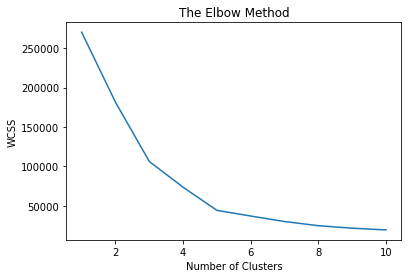

In [7]:
#using the elbow method to find the maximum number of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [8]:

#Applying KMEANS TO THE MALL DATASET
kmeans=KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)


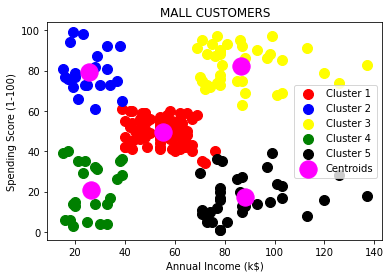

In [9]:
#VISUALIZING THE DATASET
x=np.array(x)
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1], s=100,c='red',label="Cluster 1")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1], s=100,c='blue',label="Cluster 2")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1], s=100,c='yellow',label="Cluster 3")
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1], s=100,c='green',label="Cluster 4")
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1], s=100,c='black',label="Cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c="magenta",label="Centroids")
plt.title("MALL CUSTOMERS")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()